In [71]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [111]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
ai4i_2020_predictive_maintenance_dataset = fetch_ucirepo(id=601) 
  
# data (as pandas dataframes) 
X = ai4i_2020_predictive_maintenance_dataset.data.features 
y = ai4i_2020_predictive_maintenance_dataset.data.targets 
  
# metadata 
print(ai4i_2020_predictive_maintenance_dataset.metadata) 
  
# variable information 
print(ai4i_2020_predictive_maintenance_dataset.variables) 


In [ ]:
X

In [ ]:
y

In [ ]:
import pandas as pd

X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)

In [ ]:
X_df

In [ ]:
y_df

In [ ]:
X_df.info()

X_df.describe()

In [ ]:
X_df.isnull().sum()

In [ ]:
y_df.isnull().sum()

In [ ]:
unique_values = X_df['Type'].value_counts()
print(unique_values)


In [ ]:
unique_values = y_df['Machine failure'].value_counts()
print(unique_values)
import matplotlib.pyplot as plt

# Plotting the unique values
unique_values.plot(kind='bar')

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Unique Values')

# Display the plot
plt.show()

In [ ]:
y_df.info()
y_df.describe()



In [ ]:
X_df['Type'] = X_df['Type'].replace({'L': 1, 'M': 2, 'H': 3})

In [ ]:
X_df

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = X_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
X_df.drop(['Air temperature', 'Rotational speed'], axis=1, inplace=True)

In [ ]:
X_df

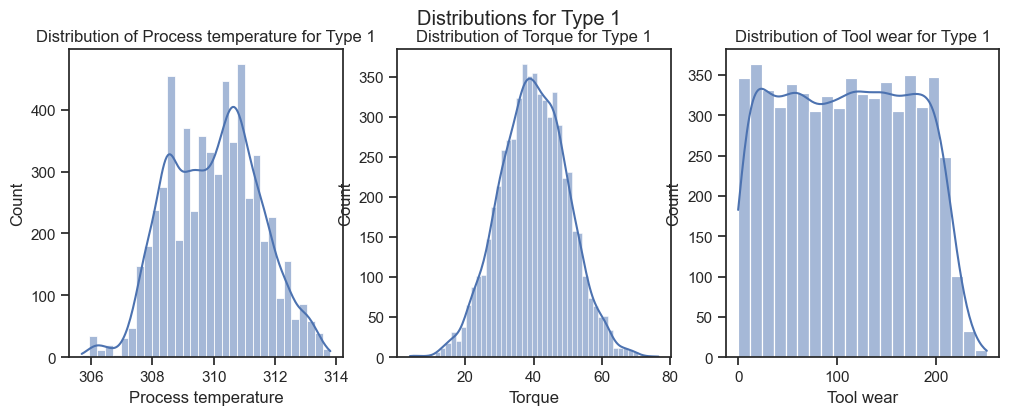

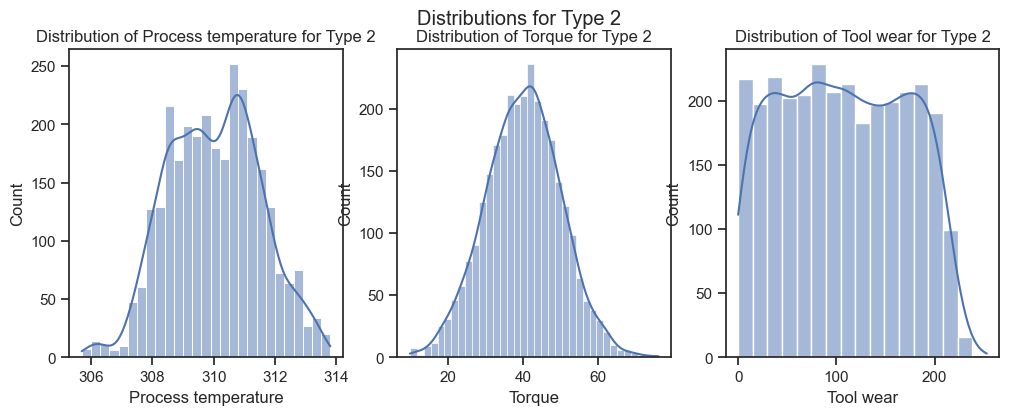

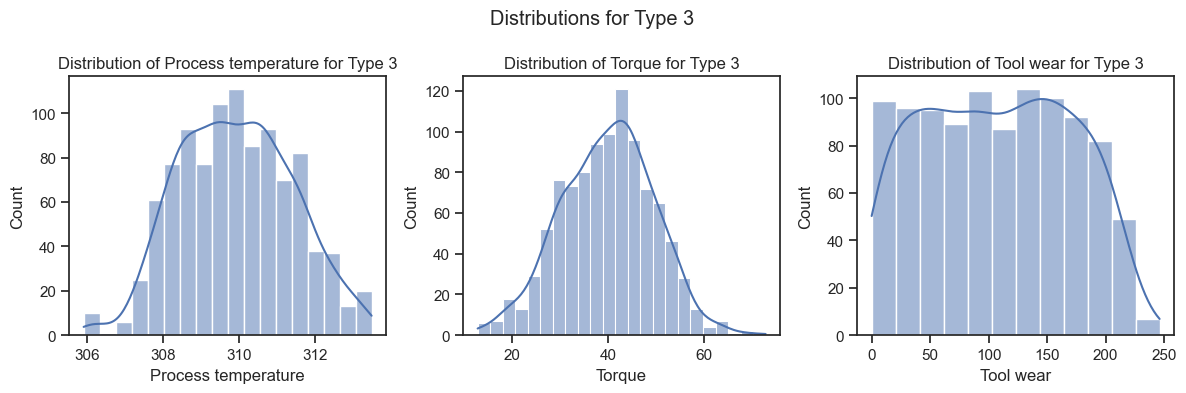

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plots
sns.set(style="ticks")

# Iterate over each type
for t in range(1, 4):
    # Filter the data for the current type
    type_data = X_df[X_df['Type'] == t]
    
    # Create subplots for each variable
    fig, axes = plt.subplots(1, len(type_data.columns[1:]), figsize=(12, 4))
    
    # Plot the distribution of each variable
    for i, column in enumerate(type_data.columns[1:]):
        sns.histplot(data=type_data, x=column, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {column} for Type {t}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Count')
    
    # Add labels and title
    plt.suptitle(f'Distributions for Type {t}')

plt.tight_layout()
plt.show()

Binary Classification


In [63]:
X_bin = X_df.copy()

In [64]:
X_bin

,Type,Process temperature,Torque,Tool wear
0,2,308.6,42.8,0
1,1,308.7,46.3,3
2,1,308.5,49.4,5
3,1,308.6,39.5,7
4,1,308.7,40.0,9
...,...,...,...,...
9995,2,308.4,29.5,14
9996,3,308.4,31.8,17
9997,2,308.6,33.4,22
9998,3,308.7,48.5,25


In [65]:
y_bin = y_df["Machine failure"]

In [66]:
y_bin

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Machine failure, Length: 10000, dtype: int64

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_bin, y_bin, test_size=0.2, random_state=42)

In [68]:
from sklearn.linear_model import LogisticRegression

# Create an instance of LogisticRegression
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = logreg.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9705


Logistic Github


In [120]:
class LogisticRegression:
    def __init__(self, learningRate, tolerance, regularization=False, lambda_param=0.1, maxIteration=50000):
        self.learningRate = learningRate
        self.tolerance = tolerance
        self.regularization = regularization
        self.lambda_param = lambda_param
        self.maxIteration = maxIteration
        
    def normalize_train_test_data(self, X_train, X_test):
        # Normalize training data
        self.X_train = self.normalize_data(X_train)
        # Normalize test data
        self.X_test = self.normalize_data(X_test)
        
    def normalize_data(self, X):
        # Normalizing each feature (column-wise)
        X_normalized = (X - X.mean(axis=0)) / X.std(axis=0)
        return X_normalized
    
    def datasetReader(self):
    #     X, y =  breast_cancer.data, breast_cancer.target
        X_train, X_test, y_train, y_test = train_test_split(X_bin, y_bin, test_size=0.2, random_state=42)
        return X_train, y_train, X_test, y_test
    
    def normalize_data(self, X):
        # Normalizing each feature (column-wise)
        X_normalized = (X - X.mean(axis=0)) / X.std(axis=0)
        return X_normalized
    
    def normalize_train_test_data(self, X_train, X_test):
        # Normalize training data
        self.X_train = self.normalize_data(X_train)
        # Normalize test data
        self.X_test = self.normalize_data(X_test)
    
    def addX0(self, X):
        return np.column_stack([np.ones([X.shape[0], 1]), X])
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def decision_boundary(self, X, w):
        # Plot decision boundary
        if X.shape[1] == 2:
            a = -w[0] / w[1]
            b = -w[2] / w[1]
            x1 = np.linspace(-5, 5, 100)
            x2 = -(w[0] + w[1] * x1) / w[2]
            plt.plot(x1, x2, label='Decision Boundary')
            plt.scatter(X[:, 0], X[:, 1], c=self.y_train, cmap='viridis')
            plt.xlabel('Feature 1')
            plt.ylabel('Feature 2')
            plt.legend()
            plt.show()
        else:
            print("Cannot plot decision boundary for datasets with more than two features.")
        
    def costFunction(self, X, y):
        z = X.dot(self.w)
        h = self.sigmoid(z)
        epsilon = 1e-5  # to prevent log(0) case
        regularization_term = 0
        if self.regularization:
            regularization_term = (self.lambda_param / (2 * X.shape[0])) * np.sum(self.w[1:]**2)  # Exclude bias term
        cost = -np.mean(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon)) + regularization_term
        return cost
    
    def gradient(self, X, y):
        z = X.dot(self.w)
        h = self.sigmoid(z)
        grad = np.dot(X.T, (h - y)) / y.size
        if self.regularization:
            grad[1:] += (self.lambda_param / X.shape[0]) * self.w[1:]  # Exclude bias term
        return grad
    
    def gradientDescent(self, X, y):
        cost_sequences = []
        last_cost = float('inf')
        for i in tqdm(range(self.maxIteration)):
            self.w = self.w - self.learningRate * self.gradient(X, y)
            cur_cost = self.costFunction(X, y)
            diff = last_cost - cur_cost
            last_cost = cur_cost
            cost_sequences.append(cur_cost)
            if diff < self.tolerance:
                print('The model stopped: Converged')
                break
                
        self.plotCost(cost_sequences)
        return 
    
    def plotCost(self, error_sequences):
        plt.plot(error_sequences)
        plt.xlabel('Iteration')
        plt.ylabel('Error')
        plt.title('Cost Function')
        plt.show()
                        
    def predict(self, X):
        z = X.dot(self.w)
        return np.round(self.sigmoid(z))
    
    def evaluate(self, y, y_hat):
        accuracy = np.mean(y == y_hat)
        epsilon = 1e-7  # small constant
        precision = np.sum((y == 1) & (y_hat == 1)) / (np.sum(y_hat) + epsilon)
        recall = np.sum((y == 1) & (y_hat == 1)) / np.sum(y)
        print(classification_report(y, y_hat))
        return accuracy, precision, recall
    
    def fit(self):
        X_train, y_train, X_test, y_test = self.datasetReader()
        self.normalize_train_test_data(X_train, X_test)  # Normalize train and test data
        self.X_train = self.addX0(self.X_train)  # Add intercept term
        self.X_test = self.addX0(self.X_test)    # Add intercept term
        if self.regularization:
            print('Solving using Gradient Descent Regularization: Enabled')
        else:
            print('Solving using Gradient Descent Regularization: Disabled')
        self.w = np.random.randn(self.X_train.shape[1])  # Initialize weights randomly
        self.gradientDescent(self.X_train, y_train)
        # Prediction and Evaluation on Test Data
        y_hat_test = self.predict(self.X_test)
        print("\nPredicted classes on test data:", y_hat_test)
        print("Actual classes on test data:", y_test)
        accuracy_test, precision_test, recall_test = self.evaluate(y_test, y_hat_test)
        print('\nEvaluation for test data:')
        print('Accuracy:', accuracy_test)
        print('Precision:', precision_test)
        print('Recall:', recall_test)
        
        self.decision_boundary(X_train, self.w)

Solving using Gradient Descent Regularization: Disabled


  0%|          | 0/50000 [00:00<?, ?it/s]

  3%|▎         | 1549/50000 [00:03<01:54, 423.78it/s]


The model stopped: Converged


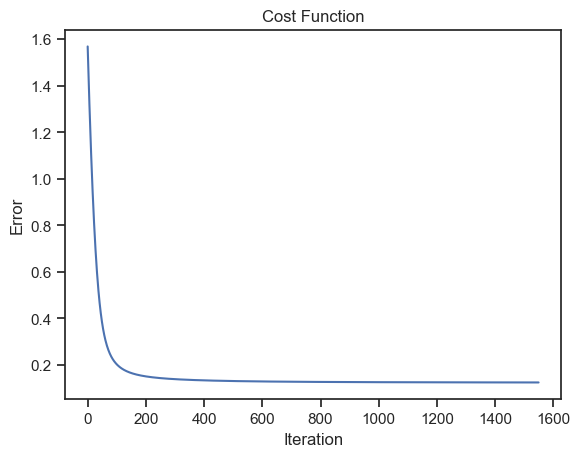


Predicted classes on test data: [0. 0. 0. ... 0. 0. 0.]
Actual classes on test data: 6252    0
4684    1
1731    0
4742    0
4521    0
       ..
6412    0
8285    0
7853    0
1095    1
6929    0
Name: Machine failure, Length: 2000, dtype: int64
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1939
           1       1.00      0.02      0.03        61

    accuracy                           0.97      2000
   macro avg       0.98      0.51      0.51      2000
weighted avg       0.97      0.97      0.96      2000


Evaluation for test data:
Accuracy: 0.97
Precision: 0.9999999000000099
Recall: 0.01639344262295082
Cannot plot decision boundary for datasets with more than two features.


In [121]:
model = LogisticRegression(learningRate=0.1, tolerance=1e-6, regularization=False, lambda_param=0.0001)
model.fit()

Solving using Gradient Descent Regularization: Enabled


  0%|          | 0/50000 [00:00<?, ?it/s]

  3%|▎         | 1523/50000 [00:03<02:05, 387.11it/s]


The model stopped: Converged


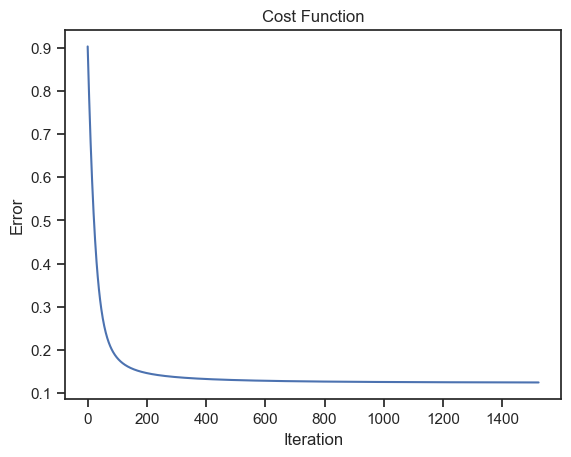


Predicted classes on test data: [0. 0. 0. ... 0. 0. 0.]
Actual classes on test data: 6252    0
4684    1
1731    0
4742    0
4521    0
       ..
6412    0
8285    0
7853    0
1095    1
6929    0
Name: Machine failure, Length: 2000, dtype: int64

Evaluation for test data:
Accuracy: 0.97
Precision: 0.9999999000000099
Recall: 0.01639344262295082
Cannot plot decision boundary for datasets with more than two features.


In [101]:
model = LogisticRegression(learningRate=0.1, tolerance=1e-6, regularization=True, lambda_param=0.01)
model.fit()

In [106]:


# Assume X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X_bin, y_bin, test_size=0.2, random_state=42)

# Define the model and pipeline
model = RandomForestClassifier(random_state=42)
pipeline = Pipeline(steps=[('smote', SMOTE()), ('model', model)])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97      1939
           1       0.26      0.64      0.37        61

    accuracy                           0.93      2000
   macro avg       0.63      0.79      0.67      2000
weighted avg       0.97      0.93      0.95      2000



In [109]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

# Assume X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X_bin, y_bin, test_size=0.2, random_state=42)

# Define the model and pipeline
model = LogisticRegression(random_state=42)
pipeline = Pipeline(steps=[('smote', SMOTE()), ('model', model)])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.73      0.84      1939
           1       0.08      0.72      0.14        61

    accuracy                           0.73      2000
   macro avg       0.53      0.72      0.49      2000
weighted avg       0.96      0.73      0.82      2000



In [110]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Assume X_bin and y_bin are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X_bin, y_bin, test_size=0.2, random_state=42, stratify=y_bin)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model and pipeline with class weights
model = LogisticRegression(class_weight='balanced', random_state=42)
pipeline = Pipeline(steps=[('smote', SMOTE(random_state=42)), ('model', model)])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

# Optional: Hyperparameter tuning
param_grid = {
    'model__C': [0.01, 0.1, 1, 10, 100],
    'model__solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Predict and evaluate with the best estimator
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Best model results:")
print(classification_report(y_test, y_pred_best))


              precision    recall  f1-score   support

           0       0.99      0.74      0.85      1932
           1       0.10      0.81      0.18        68

    accuracy                           0.74      2000
   macro avg       0.54      0.77      0.51      2000
weighted avg       0.96      0.74      0.82      2000

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best model results:
              precision    recall  f1-score   support

           0       0.99      0.74      0.85      1932
           1       0.10      0.81      0.18        68

    accuracy                           0.74      2000
   macro avg       0.54      0.77      0.51      2000
weighted avg       0.96      0.74      0.82      2000

